# Author: ABSAR AHMED
# Task#4
# Object

Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
What all security issues and insights you can derive by EDA?
You can choose any of the tool of your choice (Python/R/Tableau/PowerBI/Excel/SAP/SAS)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'F:\The Spark Foundation Dataset Csv\globalterrorismdb_0718dist.csv', encoding='latin1')

C:\Users\Absar\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

# Renaming the columns

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Groups','country_txt':'Country','nwound':'Wound','attacktype1_txt':'Attacktype','weaptype1_txt':'Weapon','nkill':'kill',
                    'targtype1_txt':'targettype'}, inplace=True)

In [6]:
df.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
df = df[['Year','Month','Day','Country','targettype','Wound','Attacktype','kill','Weapon','motive','city','region','Groups','summary']]

In [8]:
df

,Year,Month,Day,Country,targettype,Wound,Attacktype,kill,Weapon,motive,city,region,Groups,summary
0,1970,7,2,Dominican Republic,Private Citizens & Property,0.0,Assassination,1.0,Unknown,NaN,Santo Domingo,2,MANO-D,NaN
1,1970,0,0,Mexico,Government (Diplomatic),0.0,Hostage Taking (Kidnapping),0.0,Unknown,NaN,Mexico city,1,23rd of September Communist League,NaN
2,1970,1,0,Philippines,Journalists & Media,0.0,Assassination,1.0,Unknown,NaN,Unknown,5,Unknown,NaN
3,1970,1,0,Greece,Government (Diplomatic),NaN,Bombing/Explosion,NaN,Explosives,NaN,Athens,8,Unknown,NaN
4,1970,1,0,Japan,Government (Diplomatic),NaN,Facility/Infrastructure Attack,NaN,Incendiary,NaN,Fukouka,4,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Military,2.0,Armed Assault,1.0,Firearms,NaN,Ceelka Geelow,11,Al-Shabaab,12/31/2017: Assailants opened fire on a Somali...
181687,2017,12,31,Syria,Military,7.0,Bombing/Explosion,2.0,Explosives,NaN,Jableh,10,Muslim extremists,12/31/2017: Assailants launched mortars at the...
181688,2017,12,31,Philippines,Private Citizens & Property,0.0,Facility/Infrastructure Attack,0.0,Incendiary,NaN,Kubentog,5,Bangsamoro Islamic Freedom Movement (BIFM),12/31/2017: Assailants set fire to houses in K...
181689,2017,12,31,India,Government (General),0.0,Bombing/Explosion,0.0,Explosives,NaN,Imphal,6,Unknown,12/31/2017: Assailants threw a grenade at a Fo...


In [9]:
df.shape

(181691, 14)

In [10]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
targettype         0
Wound          16311
Attacktype         0
kill           10313
Weapon             0
motive        131130
city             434
region             0
Groups             0
summary        66129
dtype: int64

In [11]:
df['Wound']=df['Wound'].fillna(0)
df['kill']=df['kill'].fillna(0)

In [12]:
df['Casualities']= df['Wound']+df['kill']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   targettype   181691 non-null  object 
 5   Wound        181691 non-null  float64
 6   Attacktype   181691 non-null  object 
 7   kill         181691 non-null  float64
 8   Weapon       181691 non-null  object 
 9   motive       50561 non-null   object 
 10  city         181257 non-null  object 
 11  region       181691 non-null  int64  
 12  Groups       181691 non-null  object 
 13  summary      115562 non-null  object 
 14  Casualities  181691 non-null  float64
dtypes: float64(3), int64(4), object(8)
memory usage: 20.8+ MB


In [14]:
df.describe()

,Year,Month,Day,Wound,kill,region,Casualities
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,2.883296,2.266860,7.160938,5.150156
std,13.259430,3.388303,8.814045,34.309747,11.227057,2.933408,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,5.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,6.000000,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,10.000000,4.000000
max,2017.000000,12.000000,31.000000,8191.000000,1570.000000,12.000000,9574.000000


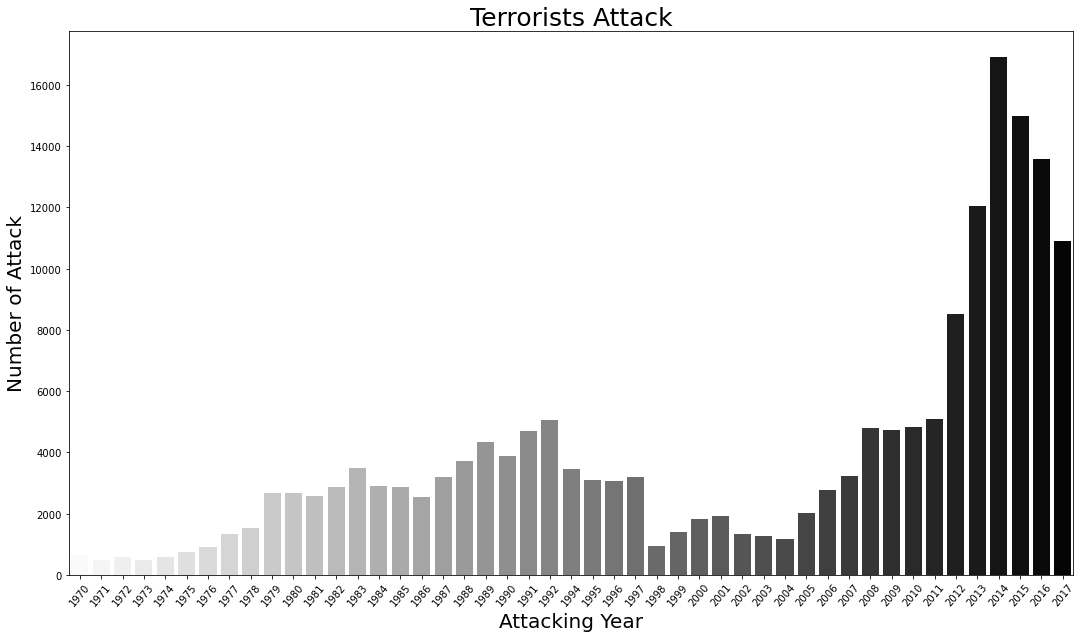

In [43]:
year = df['Year'].unique()
years_count = df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(18,10))
sns.barplot(x=year, y=years_count, palette="gray_r")
plt.xticks(rotation=50)
plt.xlabel('Attacking Year', fontsize=20)
plt.ylabel('Number of Attack', fontsize=20)
plt.title('Terrorists Attack', fontsize=25)
plt.show()

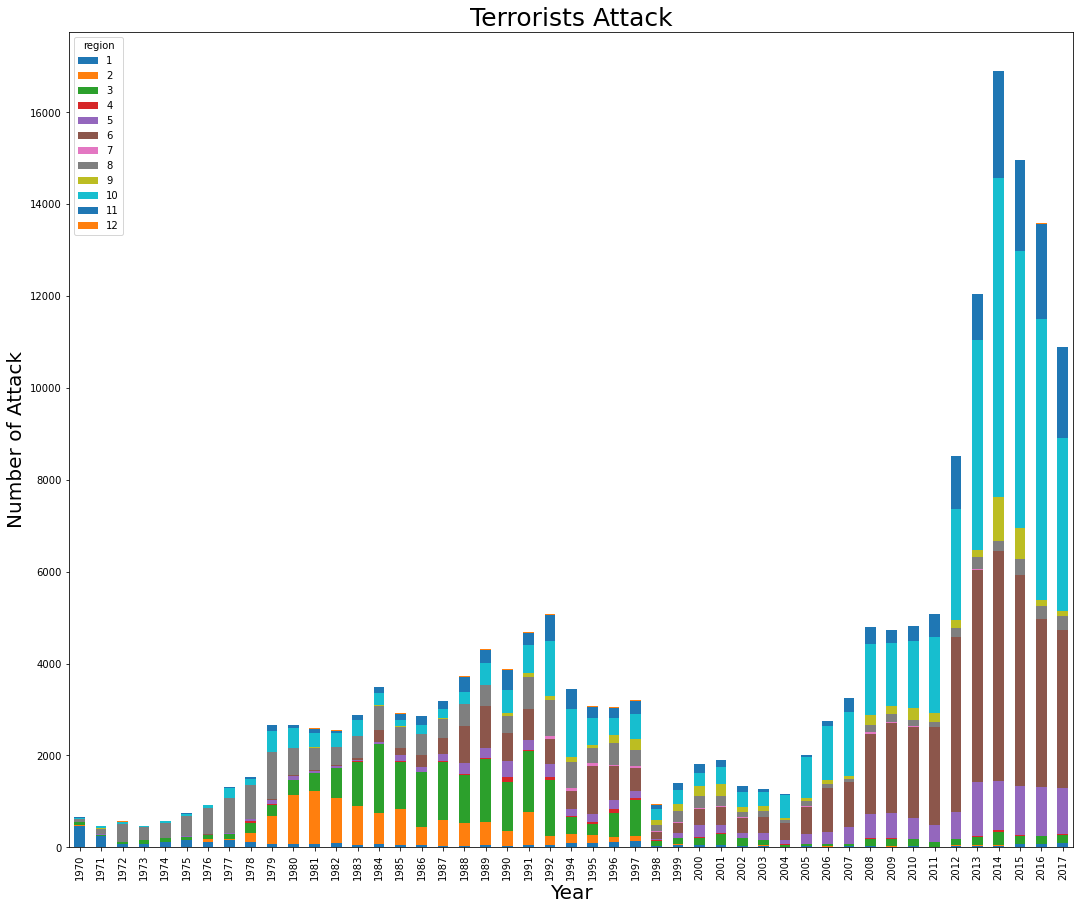

In [16]:
pd.crosstab(df.Year,df.region).plot(kind='bar',stacked=True,figsize=(18,15))
plt.title('Terrorists Attack', fontsize=25)
plt.ylabel('Number of Attack', fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.show()

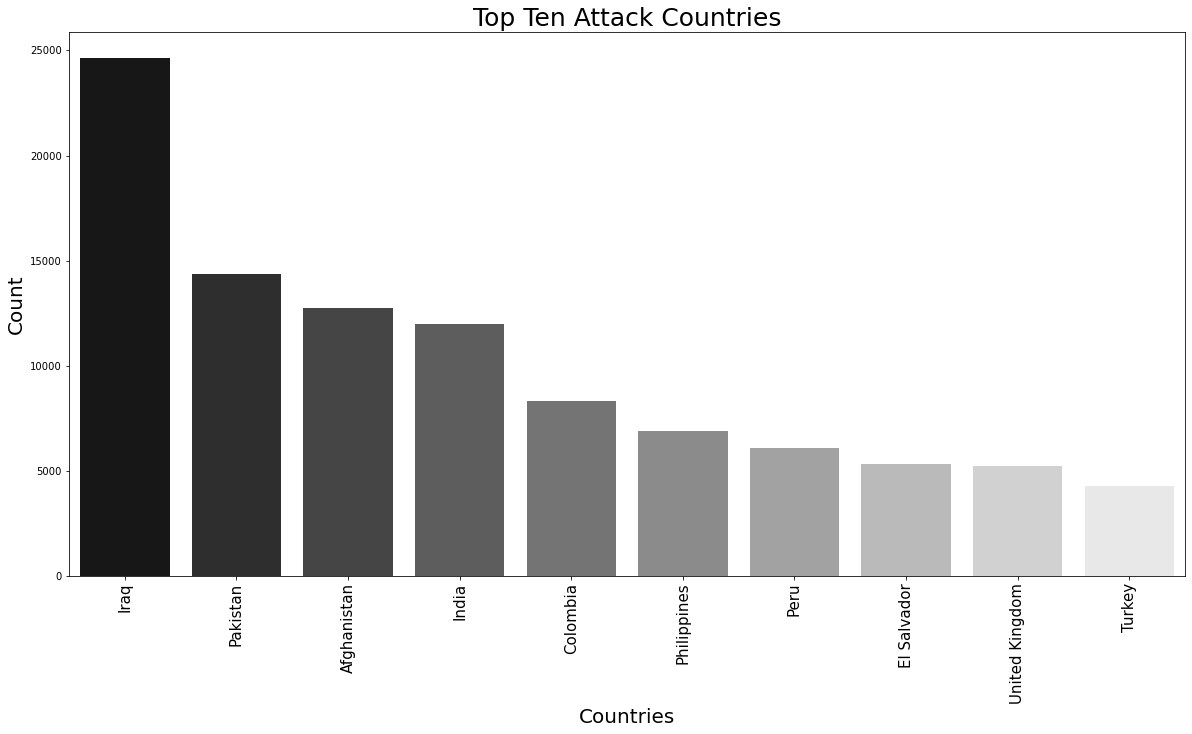

In [17]:
plt.subplots(figsize=(20,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette="gray")
plt.title('Top Ten Attack Countries', fontsize=25)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.show()




Text(0.5, 0, 'Year')

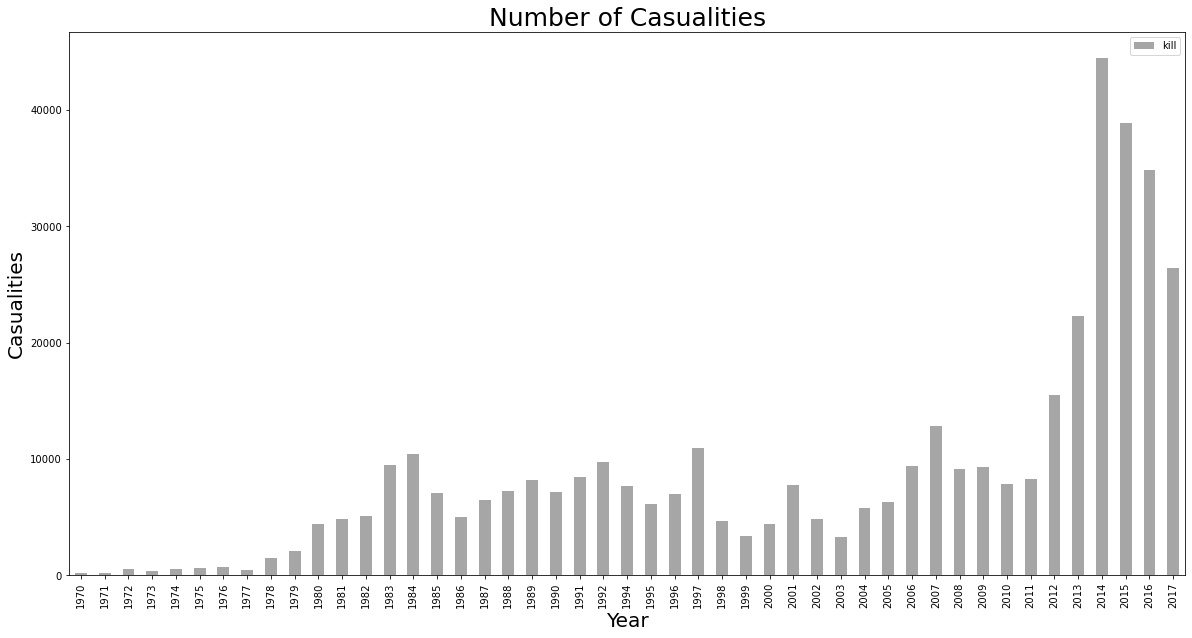

In [18]:
df1 = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 =plt.subplots(figsize=(20,10))
df1.plot(kind='bar', alpha=0.7,ax=ax4, color='gray')
plt.xticks(rotation=90)
plt.title('Number of Casualities', fontsize=25)
plt.ylabel('Casualities', fontsize=20)
plt.xlabel('Year', fontsize=20)




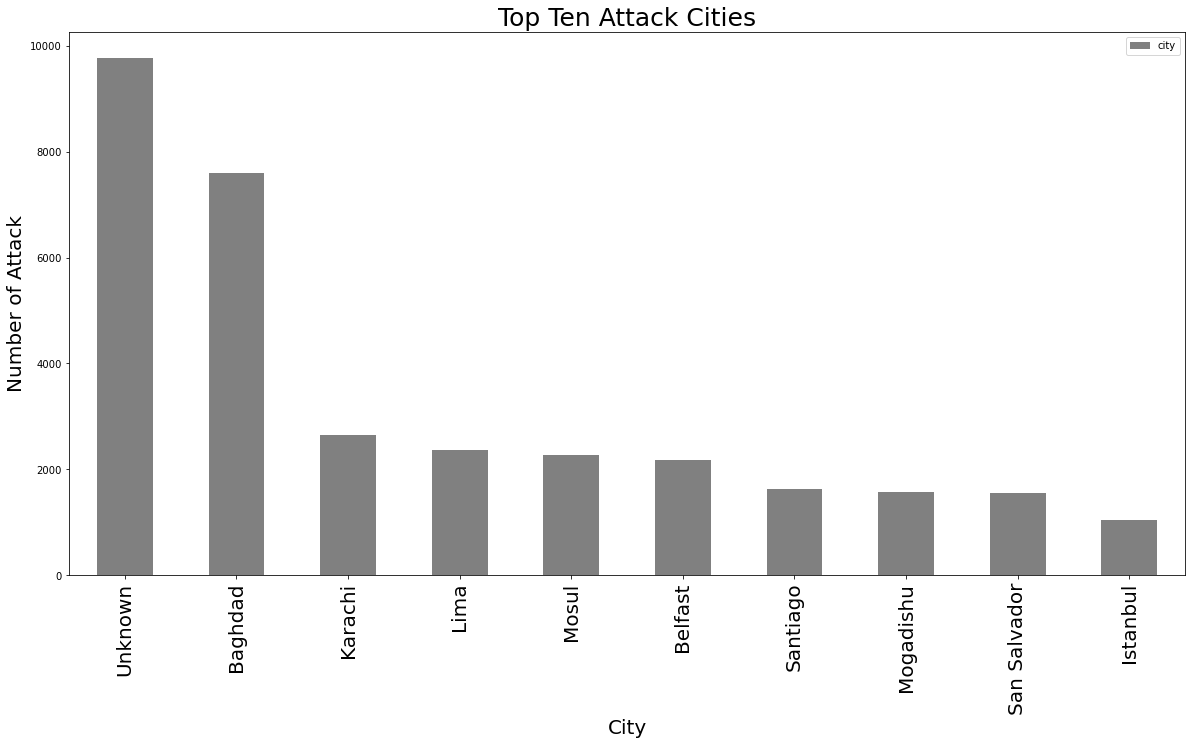

In [31]:
df['city'].value_counts().to_frame().sort_values('city', axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='gray')
plt.xticks(rotation=90, fontsize=20)
plt.xlabel('City', fontsize=20)
plt.ylabel('Number of Attack', fontsize=20)
plt.title('Top Ten Attack Cities', fontsize=25)
plt.show()


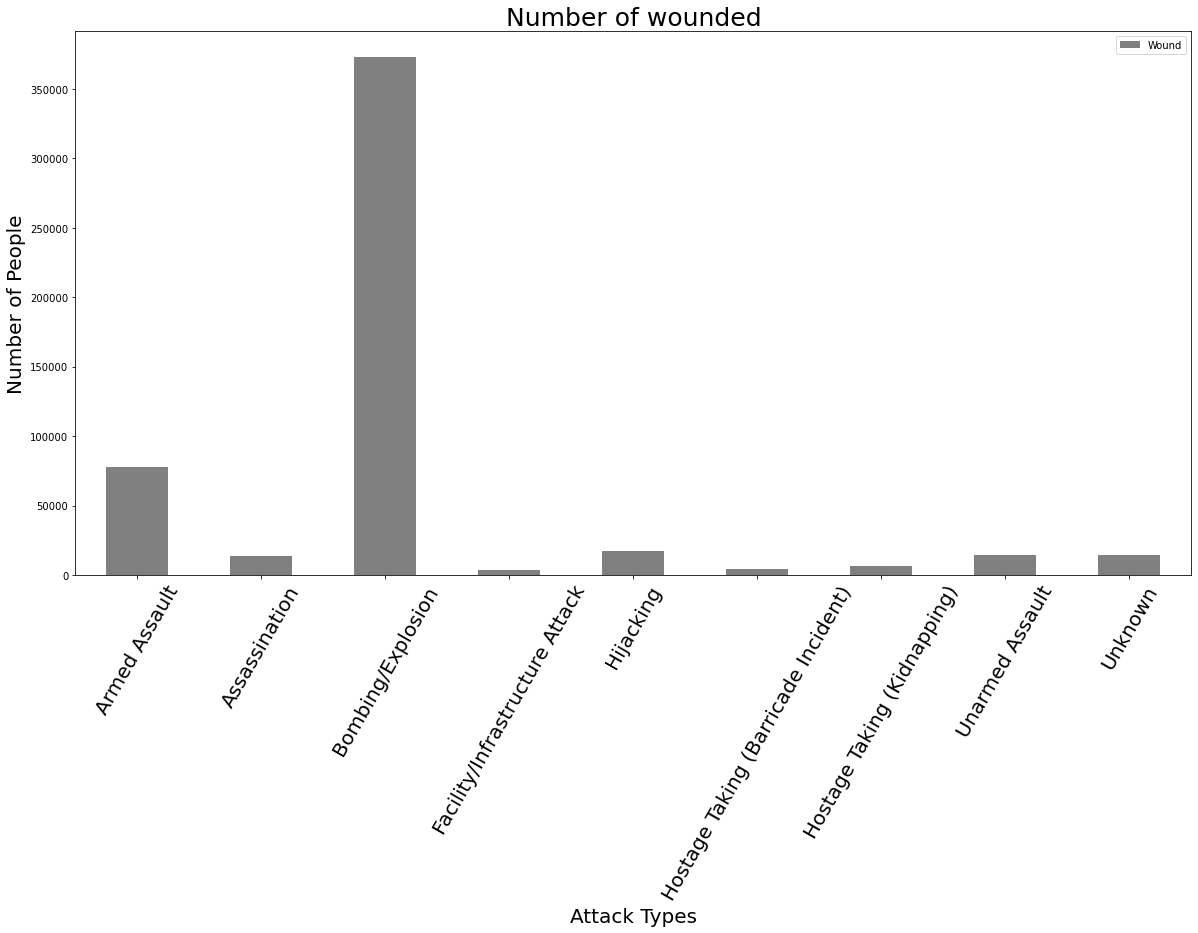

In [34]:
df[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(20,10),color='gray')
plt.xticks(rotation=60, fontsize=20)
plt.xlabel('Attack Types', fontsize=20)
plt.ylabel('Number of People', fontsize=20)
plt.title('Number of wounded', fontsize=25)
plt.show()

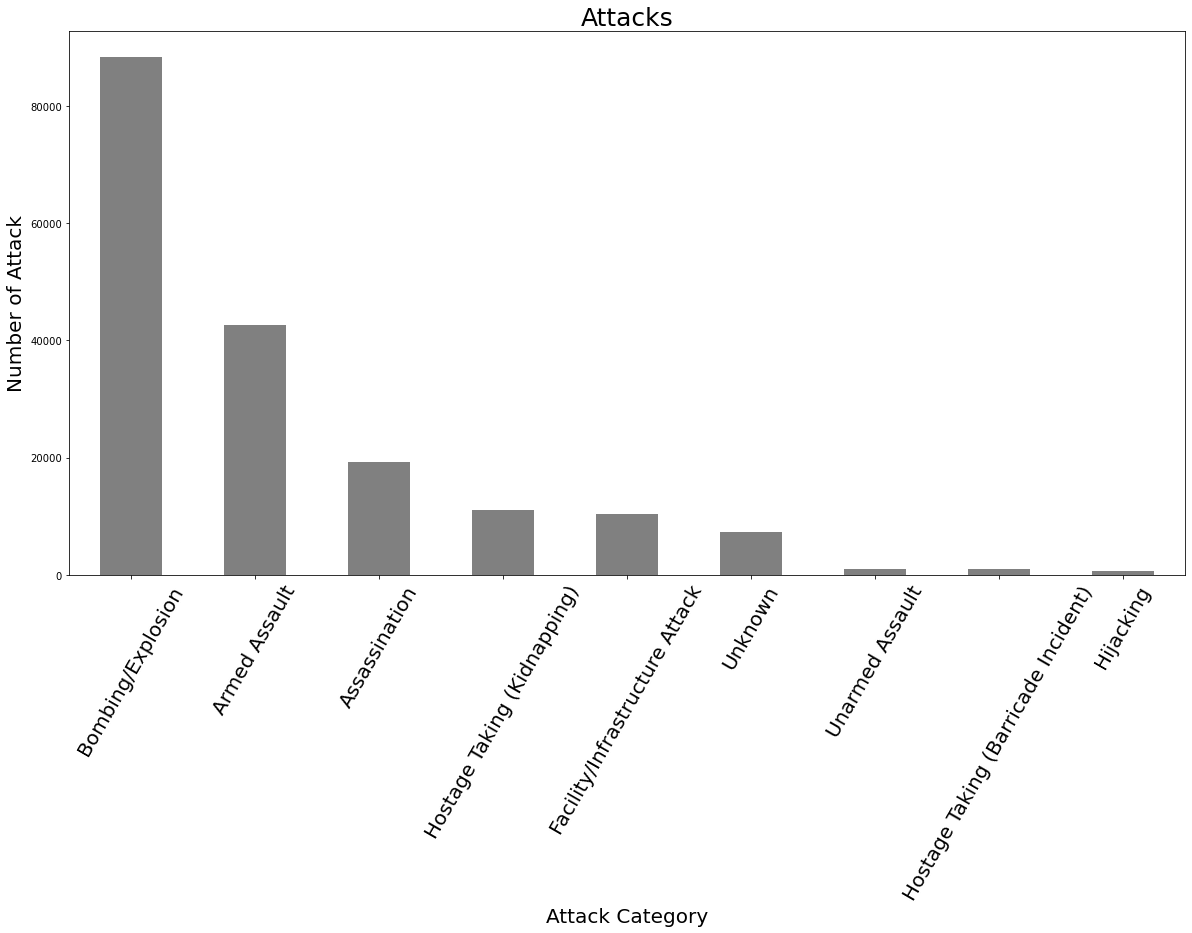

In [35]:
df['Attacktype'].value_counts().plot(kind='bar',figsize=(20,10),color='gray')
plt.xticks(rotation=60, fontsize=20)
plt.xlabel('Attack Category', fontsize=20)
plt.ylabel('Number of Attack', fontsize=20)
plt.title('Attacks', fontsize=25)
plt.show()



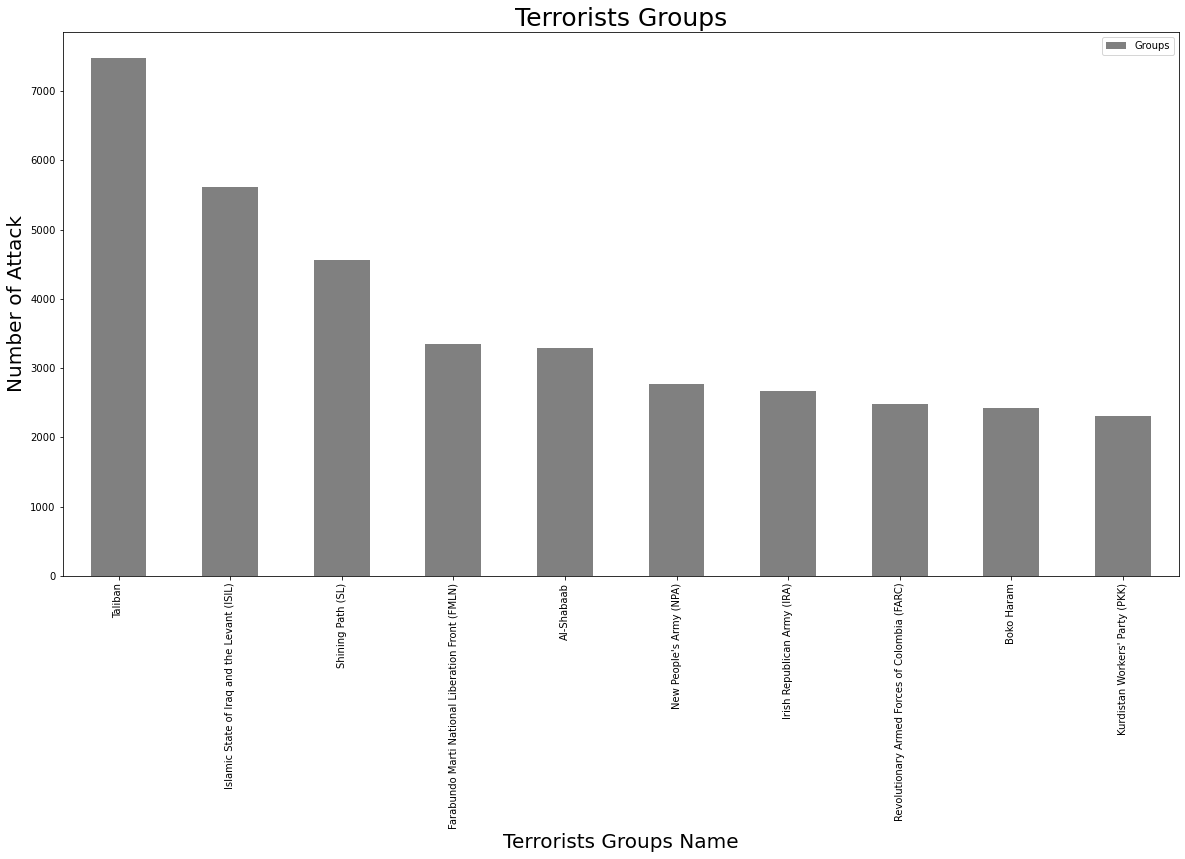

In [38]:
df['Groups'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',figsize=(20,10),color='gray')
plt.title('Terrorists Groups', fontsize=25)
plt.xlabel('Terrorists Groups Name', fontsize=20)
plt.ylabel('Number of Attack', fontsize=20)
plt.show()

In [39]:
df2 = df[['Groups', 'Country','city','kill']]
df2 =  df2.groupby(['Groups', 'Country','city','kill'],axis=0).sum().sort_values('kill',ascending=False).drop('Unknown').reset_index().head(10)
df2

C:\Users\Absar\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Groups,Country,city,kill
0,Islamic State of Iraq and the Levant (ISIL),Iraq,Tikrit,1570.0
1,Al-Qaida,United States,New York City,1384.0
2,Al-Qaida,United States,New York City,1383.0
3,Hutu extremists,Rwanda,Gikoro,1180.0
4,Islamic State of Iraq and the Levant (ISIL),Iraq,Sinjar,953.0
5,Islamic State of Iraq and the Levant (ISIL),Iraq,Badush,670.0
6,Al-Shabaab,Somalia,Mogadishu,588.0
7,Communist Party of Nepal- Maoist (CPN-M),Nepal,Dhading district,518.0
8,Islamic State of Iraq and the Levant (ISIL),Syria,Unknown,517.0
9,Islamic State of Iraq and the Levant (ISIL),Syria,Palmyra,433.0


## EXPLAINATION

So we sae earlier though the data visualization,the attacking zones are around "Middle eat and Northern Africa"followed by "South Asia"
